# Team MakePittsburghAmericaAgain (MPAA)
### Aaron Palmer, Pran Sutham

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Introduction:

What makes a neighborhood the best one in its city? Though there are infinitely many approaches to answering this question, we decide to give it a try ourselves and came up with this project to determine the **best neighborhood in Pittsburgh.**

The goal of this project is to not only arrive at an answer but a **data-driven** one using official datasets provided by the Western Pennsylvania Regional Data Center (WPRDC).

After spending considerable time thinking, we've decided to define the best neighborhood in Pittsburgh as the one that’s **the most** supremely and quintessentially **A M E R I C A N**. In other words, the more "American" a neighborhood is, the better. Keeping this in mind, we've come up with criteria examining traits that we believe affect a neighborhood’s “Americanness”. Those said criteria form the metrics explained later in this report.

Some alternative topics/metrics we've also considered throughout this process are the most health-insured, the most educated and the most educated. However, these have ultimately been scrapped due to us being unable to find datasets that we think provide us enough information about these things. 

### The Metric:

Our main metric, the **MPAA score** (short for MakePittsburghAmericaAgain), is divided into two smaller sub-metrics. As stated previously, this metric is intended to assess how American a neighborhood which - in our opinion - determines how "good" it is. The MPAA score (with limited information) measures how well-armed and well-fed a Pittsburgh neighborhood is. The two sub-metrics are explained in greater detail below.

**Sub-metric 1**: The most well-armed

The United States of America is world-famous for its gun culture, and many Americans are overtly proud of exercising their Second Amendment rights. It is hard to deny that firearms are a big part of the American identity. 

For this first sub-metric, we use the "Firearms Seizures Data" dataset from the Police Bureau / Department of Public Safety (link: https://data.wprdc.org/dataset/pbp-fire-arm-seizures). "The most armed" neighborhood is defined as the neighborhood with the lowest number of total firearm seizures (labeled as "total_count" in the dataset). The reasoning behind choosing this dataset is that the higher the number of firearm seizures is for a neighborhood, the greater the likelihood that it is well-armed.

**Sub-metric 2:** The most well-fed

The United States of America is also world-famous for its abundance of food and resultantly, its alarming rate of obesity. Americans lead the developed world in percentage of obese people and remain near the top of the charts for the entire world. 

For this second sub-metric, we use the "Obesity Rates Allegheny County Data" dataset from the Department of Health (link: https://data.wprdc.org/dataset/allegheny-county-obesity-rates). "The most well-fed" neighborhood is defined as the neighborhood with the highest estimated rate of obesity (labeled as "2006-2010 estimate of obesity" in the dataset). The estimated rate of obesity is a number ranging from 0 to 1 with 1 being the highest possible rate of obesity for a neighborhood; a neighborhood with an estimated rate of obesity of 1 would mean that all its citizens are obese. The reasoning behind choosing this dataset is simple: as a neighborhood becomes more well-fed, its rate of obesity should likely (but not always) go up. 

We must note, however, that there are some limitations and factors to keep in mind for this sub-metric. First, the numbers used here are outdated and thus may not reflect the current obesity situation in Pittsburgh. Additionally, no clear definition of "obesity" is provided meaning that there is a chance that overweight people (and not necessarily *only* obese people) are counted as well.

### Sub-metric 1: The most armed

The way we decided to use the data for this sub-metric is by first taking all of the addresses in the dataset and eliminating rows with addresses that do not have a corresponding Pittsburgh neighborhood. After all, the focus of our project is solely Pittsburgh neighborhoods.  

Additionally, we sort the dataset by neighborhood, use different graphs to visualize data, use the names of neighborhoods as indexes and make only 'total_count' up to 'dow' visible.

In [15]:
import pandas as pd
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

First thing's first, we import the dataset and turn it into a DataFrame for easier data utilization through pandas.

In [18]:
pgh_armed_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
pgh_armed_data.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


We then reorganize the data to better suit our needs including setting the neighborhoods as indexes and removing unnecessary columns.

In [19]:
rows = pgh_armed_data.count()[1]
raidDict = {}
gunDict = {}
pittGuns = pgh_armed_data.iloc[0:rows, 0:11]
pittGuns = pittGuns.dropna()
pittGuns = pittGuns.set_index('neighborhood')
pittGuns = pittGuns.drop('address',1)
pittGuns = pittGuns.sort_index()
pittGuns

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow
neighborhood,,,,,,,,,
Allegheny Center,1,0,1,0,0,0,2018,5,6
Allegheny Center,1,0,0,1,0,0,2015,9,2
Allegheny Center,1,0,1,0,0,0,2019,1,4
Allegheny Center,1,0,1,0,0,0,2017,4,0
Allegheny Center,3,0,3,0,0,0,2017,7,4
...,...,...,...,...,...,...,...,...,...
Windgap,1,0,0,0,0,1,2017,12,3
Windgap,1,0,1,0,0,0,2017,6,1
Windgap,1,0,1,0,0,0,2017,10,1


Finally, we calculate the sub-metric scores for each neighborhood. XX PROCESS!!!

The result is shown below with the neighborhoods with the five highest sub-metric scores and five lowest sub-metric scores displayed. 

In [20]:
for neigh in pittGuns.index:
    if neigh in raidDict:
        raidDict[neigh] += 1
    else:
        raidDict[neigh] = 1

row = 0

for neigh in raidDict:
    raids = raidDict[neigh]
    holder = pittGuns.iloc[row:row+raids, 0]
    row = row+raids
    guns = holder.sum()
    gunDict[neigh] = guns

scores = {}
for neigh in raidDict:
    scores[neigh] = float((gunDict[neigh])/(raidDict[neigh]))
    if(gunDict[neigh] > 9):
        scores[neigh] += int(gunDict[neigh]/10)
    if(raidDict[neigh] > 9):
        scores[neigh] -= int(raidDict[neigh]/10)

score = pd.Series(scores)
gun = pd.Series(gunDict)
raid = pd.Series(raidDict)
grs = {'Guns': gun, 'Raids': raid, 'Scores': score}
gr = {'Guns': gun, 'Raids': raid}
g = {'Scores': score}
point_graph = pd.DataFrame(gr)
final_graph = pd.DataFrame(grs)
score_graph = pd.DataFrame(g)

score.sort_values(ascending = False)
top_ten_graph = final_graph.sort_values(by = 'Scores', ascending = False).iloc[:10]
final_graph.sort_values(by = 'Scores', ascending = False)

,Guns,Raids,Scores
Homewood South,209,158,6.322785
Morningside,20,5,6.000000
Lincoln-Lemington-Belmar,91,61,4.491803
Carrick,102,75,4.360000
Marshall-Shadeland,100,75,4.333333
...,...,...,...
Chartiers City,3,3,1.000000
Oakwood,2,2,1.000000
Banksville,7,7,1.000000
West End,2,2,1.000000


Here are the neighborhoods sorted by number of gun seizures from highest to lowest.

In [21]:
final_graph.sort_values(by = 'Guns', ascending = False)

,Guns,Raids,Scores
Homewood South,209,158,6.322785
South Side Flats,130,110,3.181818
Homewood North,106,86,3.232558
Larimer,105,88,3.193182
Carrick,102,75,4.360000
...,...,...,...
Regent Square,3,3,1.000000
West End,2,2,1.000000
Mt. Oliver,2,2,1.000000
Oakwood,2,2,1.000000


And here are the neighborhoods sorted by number of raids from highest to lowest.

In [22]:
final_graph.sort_values(by = 'Raids', ascending = False)

,Guns,Raids,Scores
Homewood South,209,158,6.322785
South Side Flats,130,110,3.181818
Larimer,105,88,3.193182
Homewood North,106,86,3.232558
Hazelwood,101,80,3.262500
...,...,...,...
Esplen,3,2,1.500000
West End,2,2,1.000000
Mt. Oliver,2,2,1.000000
Oakwood,2,2,1.000000


This bar graph shows the ten highest scored neighborhoods. While Homewood South and Morningside lead the pack by a significant margin, the remaining top eight are neck-and-neck to each other.

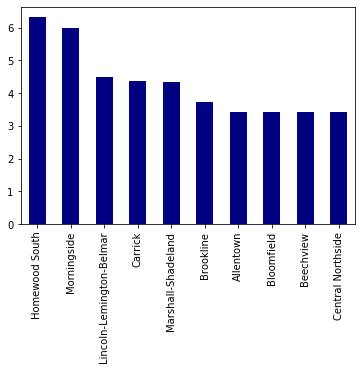

In [23]:
top_ten_graph.Scores.plot.bar(color = 'navy')

This horizontal bar graph adds on to the previous one by also showing each top ten neighborhood's gun seizure and raid numbers. Right away, we can easily see why Homewood South and Morningside are the two highest scored neighborhoods - albeit in slightly different ways.

While Homewood South X, Morningside Y.

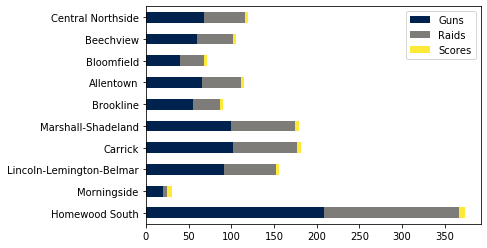

In [24]:
top_ten_graph.plot.barh(stacked = True, colormap = 'cividis')

Lastly, here's a scatter plot of all Pittsburgh neighborhoods with number of raids as the X axis and number of gun seizures as the Y axis. The color indicates how high or low each neighborhood's score is and can be interpreted using the legend on the right hand side of the plot.

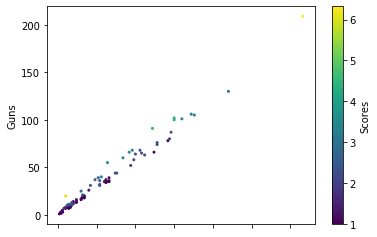

In [25]:
final_graph.plot.scatter(x = 'Raids', y = 'Guns', s = 4, c = 'Scores', colormap = 'viridis')

It will be interesting to see whether Homewood South and Morningside will remain two of the best neighborhoods in Pittsburgh after the second sub-metric is taken into consideration.

### Sub-metric 2: The most well-fed

First, we import the dataset (csv file) straight from the source and turn it into a DataFrame.

In [26]:
pgh_obese_data = pd.read_csv("https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa/download/obesity-ac-2006-2010censustracts.csv")

pgh_obese_data.head(10)

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
5,Pennsylvania,42003040400,40400,NaN,PITTSBURGH,Pittsburgh,North oakland,0.155867
6,Pennsylvania,42003040500,40500,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.112780
7,Pennsylvania,42003040600,40600,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.144556
8,Pennsylvania,42003040900,40900,NaN,PITTSBURGH,Pittsburgh,South Oakland,0.281331
9,Pennsylvania,42003050100,50100,NaN,PITTSBURGH,Pittsburgh,Middle Hill,0.608099


We then filter out every column but the two that we need: name of city neighborhood and the estimated rates of obesity.

In [27]:
pgh_obese_data_filtered = pd.pivot_table(pgh_obese_data, values = "2006-2010 estimate of obesity", index = "City Neighborhood").reset_index()
pgh_obese_data_filtered["2006-2010 estimate of obesity"] = pgh_obese_data_filtered["2006-2010 estimate of obesity"].astype(float)

pgh_obese_data_filtered.head(10)

,City Neighborhood,2006-2010 estimate of obesity
0,Allegheny Center,0.313581
1,Allegheny West,0.206399
2,Allentown,0.353925
3,Arlington,0.334520
4,Arlington Heights,0.473120
5,Banksville,0.239786
6,Bedford Dwellings,0.636222
7,Beechview,0.288799
8,Beltzhoover,0.479978
9,Bloomfield,0.232352


Here is the sorted version of the DataFrame from highest to lowest. 

In [28]:
pgh_obese_data_descending = pgh_obese_data_filtered.sort_values(by = "2006-2010 estimate of obesity", ascending=False)
pgh_obese_data_descending.head(10)

,City Neighborhood,2006-2010 estimate of obesity
58,Northview Heights,0.922932
31,Fairywood,0.820311
14,California Kirkbride,0.771046
68,Saint Clair,0.699500
83,Terrace Village,0.674103
16,Central Business District,0.668012
6,Bedford Dwellings,0.636222
41,Homewood South,0.609697
50,Middle Hill,0.608099
40,Homewood North,0.596425


And here's from lowest to highest. 

In [29]:
pgh_obese_data_ascending = pgh_obese_data_filtered.sort_values(by = "2006-2010 estimate of obesity", ascending=True)
pgh_obese_data_ascending.head(10)

,City Neighborhood,2006-2010 estimate of obesity
55,North Oakland,0.104579
56,North Shore,0.121487
77,Squirrel Hill North,0.125941
69,Shadyside,0.127718
19,Central Oakland,0.128668
57,North oakland,0.155867
66,Regent Square,0.160133
63,Point Breeze,0.167494
78,Squirrel Hill South,0.172928
1,Allegheny West,0.206399


Calculating the mean estimated rate of obesity across all Pittsburgh neighborhood gives us an average rate of around 0.3.

In [30]:
pgh_obese_data["2006-2010 estimate of obesity"].mean()

0.29950596681971153

We then plot a bar graph with each bar representing a single neighborhood, so we can see the "big picture". 

True to the average we got just now, most bars hover around the 0.3 mark with a few noticeable outliers. For the most part, however, the obesity rates of most neighborhoods cluster around the average for the whole city.

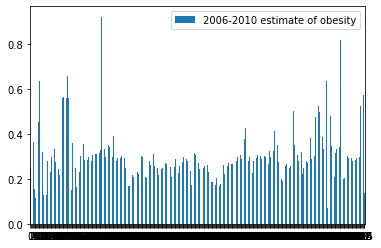

In [31]:
pgh_obese_data_graph = pgh_obese_data.plot.bar(y='2006-2010 estimate of obesity', rot=0)

### The BEST Neighborhood

Now that we have sub-metric values for each Pittsburgh neighborhood, it's time to calculate their MPAA scores.

A high MPAA score indicates a neighborhood that's perfectly American, and a low or (god forbid) negative score indicates neighborhood that's un-American (or even anti-American, if negative). To arrive at this score, simply multiply the first and second sub-metric scores of each neighborhood together! 

You may notice that the MPAA score lacks any scale or range (meaning it theoretically has no maximum value): this is a deliberate decision on our part as we believe that there is no limit to how American a neighborhood can be! 

Additionally, this will give a lot more weight to the first sub-metric compared to the second (seeing that it is not capped at 1 like the second sub-metric). This is also intentional as we consider firearms to be a better indicator of Americanness than obesity.

We first make some adjustments to the two sub-metrics' graphs to allow us to multiply the two values together. Each neighborhood's two sub-metric scores are combined into a single MPAA score as shown below.

Neighborhoods with only one sub-metric and not the other or "NaN" MPAA scores are disregarded altogether. Though it is possible to still calculate MPAA scores for these neighborhoods with incomplete information, we believe that said scores will not accurately portray reality and so, they are more or less rendered useless.

In [58]:
sub1_score = score_graph.copy(deep=True)
sub1_score["Scores"] = sub1_score["Scores"].astype(float)

sub2_score = pgh_obese_data_filtered.copy(deep=True)
sub2_score["2006-2010 estimate of obesity"] = sub2_score["2006-2010 estimate of obesity"].astype(float)
sub2_score.set_index("City Neighborhood", inplace = True)
sub2_score.rename(columns = {"2006-2010 estimate of obesity":"Scores"}, inplace = True) 

MPAA_score = sub1_score.multiply(sub2_score)
MPAA_score_filtered = MPAA_score.dropna()

Ordering the MPAA scores from highest to lowest gives us the following best neighborhoods in Pittsburgh. The best neighborhood in Pittsburgh is **Homewood South** with an MPAA score of **3.85** (rounded to the nearest hundredth)!

And for the honor that no neighborhood wants...the "Worst Neighborhood in Pittsburgh" award goes to **Regent Square** with a measly MPAA score of **0.16** (rounded to the nearest hundredth)! 

In [61]:
MPAA_score_filtered_ascending = MPAA_score_filtered.sort_values(by = "Scores", ascending=False)

MPAA_score_filtered_ascending

,Scores
Homewood South,3.854981
Lincoln-Lemington-Belmar,2.600316
Marshall-Shadeland,2.080447
Homewood North,1.927978
Morningside,1.655410
...,...
North Oakland,0.220778
Allegheny West,0.220159
Central Oakland,0.180136
Squirrel Hill North,0.167922


When we closely examine the data, it isn't hard to understand why Homewood South is the best neighborhood in Pittsburgh given all the signs that point this out.

The mean MPAA score is 0.78 (rounded to the nearest hundredth), and the standard deviation for MPAA scores is 0.60 (rounded to the nearest hundredth). Homewood South's score of 3.85 is not only a whopping 394% higher than the mean but also over 5 standard deviations higher than the mean! It would not be an exaggeration to say that Homewood South is in a class of its own when it comes to Pittsburgh neighborhoods.

In [67]:
MPAA_score_filtered.mean()

Scores    0.782168
dtype: float64

In [68]:
MPAA_score_filtered.std()

Scores    0.601261
dtype: float64

Furthermore, Homewood South makes an appearance in the top ten for both the first and second sub-metrics in first and eight place, respectively. Displayed below, the DataFrames of both sub-metrics from earlier show this.

In [69]:
final_graph.sort_values(by = 'Scores', ascending = False)

,Guns,Raids,Scores
Homewood South,209,158,6.322785
Morningside,20,5,6.000000
Lincoln-Lemington-Belmar,91,61,4.491803
Carrick,102,75,4.360000
Marshall-Shadeland,100,75,4.333333
...,...,...,...
Chartiers City,3,3,1.000000
Oakwood,2,2,1.000000
Banksville,7,7,1.000000
West End,2,2,1.000000


In [70]:
pgh_obese_data_descending.head(10)

,City Neighborhood,2006-2010 estimate of obesity
58,Northview Heights,0.922932
31,Fairywood,0.820311
14,California Kirkbride,0.771046
68,Saint Clair,0.699500
83,Terrace Village,0.674103
16,Central Business District,0.668012
6,Bedford Dwellings,0.636222
41,Homewood South,0.609697
50,Middle Hill,0.608099
40,Homewood North,0.596425


Finally, to underscore the argument for Homewood South being the best neighborhood, the following bar graph provides a visualization of just how large of a gap exists between Homewood South (and Morningside) and the rest of Pittsburgh.

AARON ADD A BAR GRAPH OF ONLY THE TOP TEN MPAA SCORES HERE. IF YOU CANT FOR WHATEVER REASON, JUST DELETE THIS CELL
AND THE CELL ABOVE THIS. THANKS!

- Pran

### Conclusion:

**Aaron:**

My personal favorite neighborhood in Pittsburgh is Oakland. This has to do with me not really being from Pittsburgh, so not knowing many, or any neighborhoods around it. Oakland is where the campus is located and one of the few areas in Pittsburgh that I have even remotely explored. The fact that Homewood South has been declared the “Most American” neighborhood, doesn't mean much to me as I do not know where Homewood South is. Since Homewood South obviously has had the most guns seized since 2015, and also the most raids, they would have the highest score.

**Pran:**

Because I have never lived anywhere else and spent very little time exploring Pittsburgh this past year, Oakland is my personal favorite neighborhood in the city by default. It is not among the top for either sub-metric which is unsurprisingly, to say the least. Oakland is filled with college students, a sub-group of the population not particularly known for possessing firearms nor for being well-fed. 

At the same time, I am not surprised that our metric would declare Homewood South as the best neighborhood in Pittsburgh. Many people in the said neighborhood possess guns (both legally and illegally) which means that the likelihood of gun seizures there is very high. This naturally drives up its MPAA score to great heights the likes of which very few neighborhoods in Pittsburgh can hope to match. 

However, I would also exercise caution when interpreting the results of our project as the sub-metrics we've used to arrive at an MPAA score might not be considered indicators of a good neighborhoods by some. 